# Setup inicial

In [46]:
import pandas as pd
import janitor
import matplotlib.pyplot as plt
from scipy.stats import zscore
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/bormann/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
df = pd.read_csv("twitter_data/exploration_dataset.csv", index_col=0)

In [4]:
df.head(10)

,param_defaults,contributors,coordinates,created_at,current_user_retweet,favorite_count,favorited,full_text,geo,hashtags,...,withheld_copyright,withheld_in_countries,withheld_scope,tweet_mode,_json,tweet_id,label,Unnamed: 41,Unnamed: 42,Unnamed: 43
0,"{'contributors': None, 'coordinates': None, 'c...",NaN,NaN,Mon Mar 02 09:48:33 +0000 2015,NaN,2,False,NaN,NaN,[Hashtag(Text='MKR')],...,NaN,NaN,NaN,compatibility,{'created_at': 'Mon Mar 02 09:48:33 +0000 2015...,"5,7233265539763E+017",racism,NaN,NaN,NaN
1,"{'contributors': None, 'coordinates': None, 'c...",NaN,"{'type': 'Point', 'coordinates': [153.37975174...",Mon Mar 02 10:23:41 +0000 2015,NaN,4,False,NaN,"{'type': 'Point', 'coordinates': [-28.07334137...",[Hashtag(Text='mkr')],...,NaN,NaN,NaN,compatibility,{'created_at': 'Mon Mar 02 10:23:41 +0000 2015...,"5,72341498827522E+017",racism,NaN,NaN,NaN
2,"{'contributors': None, 'coordinates': None, 'c...",NaN,"{'type': 'Point', 'coordinates': [153.37975174...",Mon Mar 02 10:23:41 +0000 2015,NaN,4,False,NaN,"{'type': 'Point', 'coordinates': [-28.07334137...",[Hashtag(Text='mkr')],...,NaN,NaN,NaN,compatibility,{'created_at': 'Mon Mar 02 10:23:41 +0000 2015...,"5,72341498827522E+017",none,NaN,NaN,NaN
3,"{'contributors': None, 'coordinates': None, 'c...",NaN,"{'type': 'Point', 'coordinates': [153.37975174...",Mon Mar 02 10:23:41 +0000 2015,NaN,4,False,NaN,"{'type': 'Point', 'coordinates': [-28.07334137...",[Hashtag(Text='mkr')],...,NaN,NaN,NaN,compatibility,{'created_at': 'Mon Mar 02 10:23:41 +0000 2015...,"5,72341498827522E+017",racism,NaN,NaN,NaN
4,"{'contributors': None, 'coordinates': None, 'c...",NaN,"{'type': 'Point', 'coordinates': [153.37975174...",Mon Mar 02 10:23:41 +0000 2015,NaN,4,False,NaN,"{'type': 'Point', 'coordinates': [-28.07334137...",[Hashtag(Text='mkr')],...,NaN,NaN,NaN,compatibility,{'created_at': 'Mon Mar 02 10:23:41 +0000 2015...,"5,72341498827522E+017",none,NaN,NaN,NaN
5,"{'contributors': None, 'coordinates': None, 'c...",NaN,NaN,Mon Mar 02 10:19:37 +0000 2015,NaN,2,False,NaN,NaN,[Hashtag(Text='MKR')],...,NaN,NaN,NaN,compatibility,{'created_at': 'Mon Mar 02 10:19:37 +0000 2015...,"5,72340476503724E+017",racism,NaN,NaN,NaN
6,"{'contributors': None, 'coordinates': None, 'c...",NaN,NaN,Mon Mar 02 10:19:37 +0000 2015,NaN,2,False,NaN,NaN,[Hashtag(Text='MKR')],...,NaN,NaN,NaN,compatibility,{'created_at': 'Mon Mar 02 10:19:37 +0000 2015...,"5,72340476503724E+017",none,NaN,NaN,NaN
7,"{'contributors': None, 'coordinates': None, 'c...",NaN,NaN,Mon Mar 02 10:19:37 +0000 2015,NaN,2,False,NaN,NaN,[Hashtag(Text='MKR')],...,NaN,NaN,NaN,compatibility,{'created_at': 'Mon Mar 02 10:19:37 +0000 2015...,"5,72340476503724E+017",racism,NaN,NaN,NaN
8,"{'contributors': None, 'coordinates': None, 'c...",NaN,NaN,Mon Mar 02 10:19:37 +0000 2015,NaN,2,False,NaN,NaN,[Hashtag(Text='MKR')],...,NaN,NaN,NaN,compatibility,{'created_at': 'Mon Mar 02 10:19:37 +0000 2015...,"5,72340476503724E+017",none,NaN,NaN,NaN
9,"{'contributors': None, 'coordinates': None, 'c...",NaN,NaN,Mon Mar 02 09:56:43 +0000 2015,NaN,0,False,NaN,NaN,[Hashtag(Text='MKR')],...,NaN,NaN,NaN,compatibility,{'created_at': 'Mon Mar 02 09:56:43 +0000 2015...,"5,72334712804385E+017",racism,NaN,NaN,NaN


# Explorando dados
Nesta seção o objetivo é tentar entender o que cada variável/coluna representa de informação e se ela é útil para nós ou não.

In [5]:
df.shape

(10777, 43)

Felipe Bormann: A principal coluna com certeza é a coluna "text", apesar de possuir alguns tweets repetidos, o que infelizmente reduz nossa amostra de 10777 tweets para 10650. Eu ainda não chequei o que faz os tweets serem diferentes em si mas os removi por preocaução no primeiro momento.

In [6]:
df["text"]

0        These girls are the equivalent of the irritati...
1        Drasko they didn't cook half a bird you idiot ...
2        Drasko they didn't cook half a bird you idiot ...
3        Drasko they didn't cook half a bird you idiot ...
4        Drasko they didn't cook half a bird you idiot ...
                               ...                        
10773    Ok, so #gameloading was awesome and I hope I c...
10774                     @informationchef @dannyo152 ❤️❤️
10775                                 @BenKuchera ❤️❤️❤️❤️
10776        If I ever do get scared, you'll never know. 😘
10777                      "@panelrific: Let's go 🐧🐧🐧🐧🐧🐧😃"
Name: text, Length: 10777, dtype: object

In [7]:
df["text"].drop_duplicates().size

10630

In [8]:
df.columns

Index(['param_defaults', 'contributors', 'coordinates', 'created_at',
       'current_user_retweet', 'favorite_count', 'favorited', 'full_text',
       'geo', 'hashtags', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_user_id', 'lang', 'location',
       'media', 'place', 'possibly_sensitive', 'quoted_status',
       'quoted_status_id', 'quoted_status_id_str', 'retweet_count',
       'retweeted', 'retweeted_status', 'scopes', 'source', 'text',
       'truncated', 'urls', 'user', 'user_mentions', 'withheld_copyright',
       'withheld_in_countries', 'withheld_scope', 'tweet_mode', '_json',
       'tweet_id', 'label', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43'],
      dtype='object')

Felipe Bormann: Duas colunas que eu acho que podem gerar features interessantes é saber se aquele tweet foi em respostas à um usuário ou algum tweet específico. (eu ainda não sei a diferença entre os dois campos mas eles possuem quantidades diferentes, como mostrado abaixo).

In [9]:
df["in_reply_to_status_id"].notnull().sum()

3936

In [10]:
df["in_reply_to_user_id"].notnull().sum()

4083

Analisando a distribuição de usuários.
Limpeza: três usuários são nulos, estes nós vamos remover da base também.

In [11]:
import json
import numpy as np

In [12]:
df[df["user"].isnull()]

,param_defaults,contributors,coordinates,created_at,current_user_retweet,favorite_count,favorited,full_text,geo,hashtags,...,withheld_copyright,withheld_in_countries,withheld_scope,tweet_mode,_json,tweet_id,label,Unnamed: 41,Unnamed: 42,Unnamed: 43


In [13]:
def is_json(myjson):
  try:
    json_object = json.loads(myjson)
  except ValueError as e:
    return False
  return True

In [14]:
# removendo os usuários nulos da base
df = df[(~df["user"].isnull()) & (df["user"].apply(lambda user: is_json(user)))]

In [15]:
df["user"]

0        {"created_at": "Thu Jul 03 11:27:16 +0000 2014...
1        {"created_at": "Sun Jan 31 11:35:37 +0000 2010...
2        {"created_at": "Sun Jan 31 11:35:37 +0000 2010...
3        {"created_at": "Sun Jan 31 11:35:37 +0000 2010...
4        {"created_at": "Sun Jan 31 11:35:37 +0000 2010...
                               ...                        
10773    {"created_at": "Sat Feb 23 07:27:19 +0000 2008...
10774    {"created_at": "Sat Feb 23 07:27:19 +0000 2008...
10775    {"created_at": "Sat Feb 23 07:27:19 +0000 2008...
10776    {"created_at": "Sat Feb 23 07:27:19 +0000 2008...
10777    {"created_at": "Fri Aug 22 23:28:35 +0000 2014...
Name: user, Length: 10703, dtype: object

In [16]:
df.shape

(10703, 43)

In [17]:
df["user"].apply(lambda user_data: json.loads(user_data) if user_data is not None else None)

0        {'created_at': 'Thu Jul 03 11:27:16 +0000 2014...
1        {'created_at': 'Sun Jan 31 11:35:37 +0000 2010...
2        {'created_at': 'Sun Jan 31 11:35:37 +0000 2010...
3        {'created_at': 'Sun Jan 31 11:35:37 +0000 2010...
4        {'created_at': 'Sun Jan 31 11:35:37 +0000 2010...
                               ...                        
10773    {'created_at': 'Sat Feb 23 07:27:19 +0000 2008...
10774    {'created_at': 'Sat Feb 23 07:27:19 +0000 2008...
10775    {'created_at': 'Sat Feb 23 07:27:19 +0000 2008...
10776    {'created_at': 'Sat Feb 23 07:27:19 +0000 2008...
10777    {'created_at': 'Fri Aug 22 23:28:35 +0000 2014...
Name: user, Length: 10703, dtype: object

In [18]:
df["user"][0]

'{"created_at": "Thu Jul 03 11:27:16 +0000 2014", "description": "I write books https://t.co/HhlLFE07RL ,Cancer Survivor, chat politics, women issues, social justice, artist, music, movie buff, RT not nec endorsemt", "favourites_count": 27951, "followers_count": 2168, "friends_count": 2184, "id": 2601524623, "id_str": "2601524623", "listed_count": 85, "location": "Victoria Australia", "name": "CreatetheWorldYouWant", "profile_background_color": "BADFCD", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme12/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme12/bg.gif", "profile_background_tile": true, "profile_banner_url": "https://pbs.twimg.com/profile_banners/2601524623/1418679518", "profile_image_url": "http://pbs.twimg.com/profile_images/672163598970433536/qubocyRk_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/672163598970433536/qubocyRk_normal.jpg", "profile_link_color": "3B94D9", "profile_

In [19]:
df["user_id"] = df["user"].apply(lambda user_data: str(json.loads(user_data)["id"]) if isinstance(json.loads(user_data),dict) else None)

In [20]:
df.dtypes

param_defaults              object
contributors               float64
coordinates                 object
created_at                  object
current_user_retweet       float64
favorite_count               int64
favorited                     bool
full_text                  float64
geo                         object
hashtags                    object
id                          object
id_str                      object
in_reply_to_screen_name     object
in_reply_to_status_id      float64
in_reply_to_user_id        float64
lang                        object
location                   float64
media                       object
place                       object
possibly_sensitive          object
quoted_status               object
quoted_status_id           float64
quoted_status_id_str        object
retweet_count                int64
retweeted                     bool
retweeted_status            object
scopes                     float64
source                      object
text                

Um fato importante do dataset, é que só temos 1561 usuários, ou seja, em média 4 tweets por usuário. Mas vou checar a distribuição de tweets por cada um.

In [21]:
df["user_id"].unique().size

1500

## Removendo usuários com muitos mais tweets que os outros

In [22]:
users_tweet_count_df = df.groupby("user_id").count()["tweet_id"].reset_index()
users_tweet_count_df = users_tweet_count_df.rename(columns={"tweet_id": "tweet_amount"})

In [23]:
users_tweet_count_df

,user_id,tweet_amount
0,1000801513,1
1,1005637784,1
2,100658892,2
3,1008161004,1
4,1010956802,1
...,...,...
1494,98896743,6
1495,990206568,1
1496,990582259,1
1497,99233470,2


In [24]:
# tweet_id aqui poderia ficar com um nome melhor, como tweet_count
amount_of_tweet_df = df.groupby("user_id").count()["tweet_id"].reset_index().groupby("tweet_id").count().reset_index()
amount_of_tweet_df = amount_of_tweet_df.rename(columns={"tweet_id": "tweet_amount", "user_id": "user_count"})
amount_of_tweet_df.head(5)

,tweet_amount,user_count
0,1,931
1,2,242
2,3,86
3,4,67
4,5,40


Só um usuário possui **3746 tweets**!

In [25]:
amount_of_tweet_df["tweet_amount"].max()

3600

In [26]:
amount_of_tweet_df.head(50)

,tweet_amount,user_count
0,1,931
1,2,242
2,3,86
3,4,67
4,5,40
5,6,16
6,7,15
7,8,17
8,9,12
9,10,13


In [27]:
z_scores = zscore(amount_of_tweet_df[["tweet_amount"]])

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 0.5).all(axis=1)
#new_df = df[filtered_entries]

In [28]:
amount_of_tweet_df = amount_of_tweet_df[filtered_entries]

Um grande quantidade de usuários só tweetou 1x, isso é bom, porque ai tem um bom sample de pessoas diferentes, contudo, essa concentração em um usuário só é bem complicado. Vou checar se há uma grande quantidade de elementos da label positiva neste usuário.

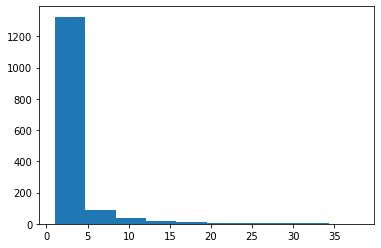

In [29]:
plt.hist(amount_of_tweet_df["tweet_amount"], 10, weights=amount_of_tweet_df["user_count"])
plt.show()

Iremos remover os usuários que possuem acima de 40 tweets, como mostra o gráfico assim, são aqueles onde os usuários que os criaram não possuem um z_score maior que 0.5.

In [30]:
# coletando somente os user_ids com menos de 40 tweets
users_tweet_count_df = users_tweet_count_df.loc[users_tweet_count_df["tweet_amount"] <= 40]
df = pd.merge(df, users_tweet_count_df, on="user_id")

In [31]:
df.shape

(3701, 45)

Como dar pra ver, só removemos 4 usuários da base, ou seja, eles dominavam a maior partes do tweets, o que poderia enviezar o modelo para a forma que eles escreviam

In [32]:
df["user_id"].unique().size

1496

## Remover tweets em que não temos o texto

In [33]:
df[df["text"].notnull()]["text"]

0       These girls are the equivalent of the irritati...
1                     Who is writing the bimbolines? #mkr
2       Colin will save them. They're pretty blondes, ...
3        Which will end first: #mkr or Tony Abbott as PM?
4       RT @TheAngelaOfOz: That's bullshit Colin and y...
                              ...                        
3696    Ready to run playing as mkr background music 😍...
3697            The Lorax has the same doorbell as #MKR 😅
3698                Pancakes are looking delicious #mkr 😋
3699    Pete Evans writes a paleo book for babies and ...
3700    RT @tahliaandfamily: Ready to run playing as m...
Name: text, Length: 3701, dtype: object

# Analisando tweets sem ódio

In [39]:
label_none_df = df[df["label"] == "none"]

# Analisando tweets com discurso de ódio

In [40]:
hate_df = df[df["label"] != "none"]

In [41]:
hate_df.shape

(733, 45)

In [42]:
hate_df["text"]

0       These girls are the equivalent of the irritati...
1                     Who is writing the bimbolines? #mkr
2       Colin will save them. They're pretty blondes, ...
5       Drasko they didn't cook half a bird you idiot ...
7       Drasko they didn't cook half a bird you idiot ...
                              ...                        
2010                              Celine fuck off. 🔫 #mkr
2014    REALLY wish it were bitch face and her husband...
2015    “@IvanTrba: At least the #promogirls might hav...
2025    “@jaccidental: Krazy-eyes Kat needs a kick in ...
2069    Funny how Kat thinks that everyone is loving h...
Name: text, Length: 733, dtype: object

In [43]:
from collections import Counter

Counter(" ".join(hate_df["text"]).split()).most_common(100)

[('#MKR', 359),
 ('#mkr', 334),
 ('the', 279),
 ('a', 225),
 ('Kat', 169),
 ('and', 161),
 ('to', 159),
 ('I', 154),
 ('is', 138),
 ('of', 113),
 ('you', 107),
 ('RT', 93),
 ('are', 88),
 ('that', 87),
 ('in', 85),
 ('they', 73),
 ('on', 73),
 ('girls', 64),
 ('for', 60),
 ('be', 57),
 ('not', 57),
 ('just', 52),
 ('her', 52),
 ('like', 46),
 ('think', 44),
 ('have', 40),
 ('it', 36),
 ('as', 35),
 ('@mykitchenrules', 35),
 ('so', 35),
 ('with', 34),
 ('#MKR2015', 34),
 ('The', 34),
 ('these', 32),
 ('she', 32),
 ('get', 32),
 ('-', 31),
 ('was', 31),
 ('has', 31),
 ('but', 30),
 ('at', 29),
 ('your', 29),
 ('all', 28),
 ('can', 28),
 ('Andre', 28),
 ('pretty', 27),
 ('from', 27),
 ('will', 26),
 ('face', 26),
 ('up', 26),
 ('this', 26),
 ('want', 26),
 ('out', 26),
 ('bitch', 25),
 ('off', 23),
 ('my', 23),
 ('blonde', 23),
 ('Katie', 23),
 ('blondes', 22),
 ('were', 22),
 ('one', 22),
 ("I'm", 22),
 ('if', 22),
 ('still', 22),
 ('go', 21),
 ('more', 21),
 ('their', 21),
 ('two', 21),

Como dá pra ver várias das palavras mais comuns são stopwords, então por isso, vou retirar as stopwords dos textos para ver o que de fato sobra e é relevante para identificar um hate speech.

In [58]:
hate_df["text_without_stopwords"] = hate_df['text'].apply(lambda x: " ".join([item for item in x.split() if item not in stop]))

<ipython-input-58-a32237339c16>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hate_df["text_without_stopwords"] = hate_df['text'].apply(lambda x: " ".join([item for item in x.split() if item not in stop]))


In [59]:
hate_df["text_without_stopwords"]

0       These girls equivalent irritating Asian girls ...
1                            Who writing bimbolines? #mkr
2       Colin save them. They're pretty blondes, keep ...
5                        Drasko cook half bird idiot #mkr
7                        Drasko cook half bird idiot #mkr
                              ...                        
2010                              Celine fuck off. 🔫 #mkr
2014    REALLY wish bitch face husband sudden death 😡 ...
2015    “@IvanTrba: At least #promogirls might future ...
2025    “@jaccidental: Krazy-eyes Kat needs kick ku......
2069    Funny Kat thinks everyone loving dish people t...
Name: text_without_stopwords, Length: 733, dtype: object

In [60]:
Counter(" ".join(hate_df["text_without_stopwords"]).split()).most_common(100)

[('#MKR', 359),
 ('#mkr', 334),
 ('Kat', 169),
 ('I', 154),
 ('RT', 93),
 ('girls', 64),
 ('like', 46),
 ('think', 44),
 ('@mykitchenrules', 35),
 ('#MKR2015', 34),
 ('The', 34),
 ('get', 32),
 ('-', 31),
 ('Andre', 28),
 ('pretty', 27),
 ('face', 26),
 ('want', 26),
 ('bitch', 25),
 ('blonde', 23),
 ('Katie', 23),
 ('blondes', 22),
 ('one', 22),
 ("I'm", 22),
 ('still', 22),
 ('go', 21),
 ('two', 21),
 ('promo', 20),
 ('hot', 20),
 ('Nikki', 20),
 ('If', 20),
 ('#mkr2015', 20),
 ('would', 19),
 ('#killerblondes', 19),
 ('Annie', 19),
 ('These', 18),
 ('see', 18),
 ('Oh', 18),
 ("can't", 17),
 ('know', 17),
 ('&amp;', 17),
 ('make', 16),
 ('back', 16),
 ('Kat,', 16),
 ('even', 16),
 ('#cuntandandre', 16),
 ('dumb', 15),
 ('going', 15),
 ('hope', 15),
 ('cook', 14),
 ('u', 14),
 ('So', 14),
 ('better', 14),
 ('really', 14),
 ('right', 14),
 ("Kat's", 14),
 ('kat', 14),
 ('fucking', 13),
 ('looks', 13),
 ('.', 13),
 ('look', 13),
 ('And', 13),
 ('cooking', 12),
 ('My', 12),
 ('Just', 12)

# criando novas features

In [35]:
cleaned_df = df
cleaned_df.to_csv("TempData/cleaned_data.csv")

In [36]:
cleaned_df

,param_defaults,contributors,coordinates,created_at,current_user_retweet,favorite_count,favorited,full_text,geo,hashtags,...,withheld_scope,tweet_mode,_json,tweet_id,label,Unnamed: 41,Unnamed: 42,Unnamed: 43,user_id,tweet_amount
0,"{'contributors': None, 'coordinates': None, 'c...",NaN,NaN,Mon Mar 02 09:48:33 +0000 2015,NaN,2,False,NaN,NaN,[Hashtag(Text='MKR')],...,NaN,compatibility,{'created_at': 'Mon Mar 02 09:48:33 +0000 2015...,"5,7233265539763E+017",racism,NaN,NaN,NaN,2601524623,5
1,"{'contributors': None, 'coordinates': None, 'c...",NaN,NaN,Mon Mar 02 09:58:33 +0000 2015,NaN,0,False,NaN,NaN,[Hashtag(Text='mkr')],...,NaN,compatibility,{'created_at': 'Mon Mar 02 09:58:33 +0000 2015...,"5,72335171862594E+017",sexism,NaN,NaN,NaN,2601524623,5
2,"{'contributors': None, 'coordinates': None, 'c...",NaN,NaN,Mon Mar 02 09:53:39 +0000 2015,NaN,1,False,NaN,NaN,[Hashtag(Text='mkr')],...,NaN,compatibility,{'created_at': 'Mon Mar 02 09:53:39 +0000 2015...,"5,72333942440767E+017",sexism,NaN,NaN,NaN,2601524623,5
3,"{'contributors': None, 'coordinates': None, 'c...",NaN,NaN,Mon Mar 02 10:03:59 +0000 2015,NaN,2,False,NaN,NaN,[Hashtag(Text='mkr')],...,NaN,compatibility,{'created_at': 'Mon Mar 02 10:03:59 +0000 2015...,"5,72336542179459E+017",none,NaN,NaN,NaN,2601524623,5
4,"{'contributors': None, 'coordinates': None, 'c...",NaN,NaN,Mon Mar 02 09:56:52 +0000 2015,NaN,0,False,NaN,NaN,[Hashtag(Text='mkr')],...,NaN,compatibility,{'created_at': 'Mon Mar 02 09:56:52 +0000 2015...,"5,72334749840101E+017",none,NaN,NaN,NaN,2601524623,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3696,"{'contributors': None, 'coordinates': None, 'c...",NaN,NaN,Thu Mar 12 09:15:51 +0000 2015,NaN,0,False,NaN,NaN,[Hashtag(Text='mkr')],...,NaN,compatibility,{'created_at': 'Thu Mar 12 09:15:51 +0000 2015...,"5,759483075932E+017",none,NaN,NaN,NaN,1661663203,1
3697,"{'contributors': None, 'coordinates': None, 'c...",NaN,NaN,Sat Mar 14 08:19:07 +0000 2015,NaN,0,False,NaN,NaN,[Hashtag(Text='MKR')],...,NaN,compatibility,{'created_at': 'Sat Mar 14 08:19:07 +0000 2015...,"5,76658802910495E+017",none,NaN,NaN,NaN,191741196,1
3698,"{'contributors': None, 'coordinates': None, 'c...",NaN,NaN,Thu Mar 12 09:13:47 +0000 2015,NaN,1,False,NaN,NaN,[Hashtag(Text='mkr')],...,NaN,compatibility,{'created_at': 'Thu Mar 12 09:13:47 +0000 2015...,"5,75947787474461E+017",none,NaN,NaN,NaN,1330268850,1
3699,"{'contributors': None, 'coordinates': None, 'c...",NaN,"{'type': 'Point', 'coordinates': [145.08564091...",Sat Mar 14 11:17:58 +0000 2015,NaN,2,False,NaN,"{'type': 'Point', 'coordinates': [-38.19827417...","[Hashtag(Text='peteevans'), Hashtag(Text='mkr'...",...,NaN,compatibility,{'created_at': 'Sat Mar 14 11:17:58 +0000 2015...,"5,76703811961532E+017",none,NaN,NaN,NaN,1309068553,1


In [37]:
cleaned_df.loc[:, ["text", "label"]].to_csv("TempData/model_data.csv")

In [38]:
cleaned_df.groupby("label").count()

,param_defaults,contributors,coordinates,created_at,current_user_retweet,favorite_count,favorited,full_text,geo,hashtags,...,withheld_in_countries,withheld_scope,tweet_mode,_json,tweet_id,Unnamed: 41,Unnamed: 42,Unnamed: 43,user_id,tweet_amount
label,,,,,,,,,,,,,,,,,,,,,
none,2968,0,124,2968,0,2968,2968,0,124,2968,...,0,0,2968,2968,2968,0,0,0,2968,2968
racism,10,0,2,10,0,10,10,0,2,10,...,0,0,10,10,10,0,0,0,10,10
sexism,723,0,40,723,0,723,723,0,40,723,...,0,0,723,723,723,0,0,0,723,723


Como pode ver, o resultado final é que temos 2968 tweets que não possuem discurso de ódio e 733 que possuem.
O que indica 19,8% da classe "ódio" e 80,2% de classe "sem ódio".